In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

def sinus_wave(freq, sample_rate, duration):
    t = np.linspace(0., duration, int(sample_rate * duration), False)
    sinus = np.sin(2. * np.pi * freq * t)
    return sinus

def saw_wave(freq, sample_rate, duration, num_harmonics):
    t = np.linspace(0., duration, int(sample_rate * duration), False)
    saw = np.zeros_like(t)

    for h in range(1, num_harmonics+1):
        saw += np.sin(2. * np.pi * h * freq * t) / h

    saw *= (-2. / np.pi)
    return saw

def square_wave(freq, sample_rate, duration, num_harmonics):
    t = np.linspace(0., duration, int(sample_rate * duration), False)
    square = np.zeros_like(t)

    for h in range(1, num_harmonics+1, 2):
        square += np.sin(2. * np.pi * h * freq * t) / h

    square *= (4. / np.pi)
    return square

def plot_waveform(sample_rate, waveform, title="", time_range_ms=10.0):
    duration = len(waveform) / sample_rate
    t = np.linspace(0., duration, len(waveform), False)

    # Plot only the first few milliseconds defined by time_range_ms
    time_range_samples = int(time_range_ms * sample_rate / 1000)
    
    plt.figure(figsize=(10, 4))
    plt.plot(t[:time_range_samples], waveform[:time_range_samples])
    plt.title(title)
    plt.grid()
    plt.xlabel ('Zeit')
    plt.ylabel ('Amplitude')
    plt.savefig(f'{img_folder}{title}.{img_format}', dpi=300 )
    plt.show()

def plot_sin_overtones(freq, sample_rate, duration, num_harmonics, title=""):
    t = np.linspace(0., duration, int(sample_rate * duration), False)
    plt.figure(figsize=(10, 4))

    for h in range(1, num_harmonics + 1):
        overtone = np.sin(2. * np.pi * h * freq * t) / h
        plt.plot(t[:int(10 * sample_rate / 1000)], overtone[:int(10 * sample_rate / 1000)],
                 label='Oberton ' + str(h))
    title = 'harmonische Obertöne einer ' + title
    plt.title(title)
    plt.grid()
    plt.legend(loc='upper right')
    plt.xlabel ('Zeit')
    plt.ylabel ('Amplitude')
    plt.savefig(f'{img_folder}{title}.{img_format}', dpi=300 )
    plt.show()

def plot_spectrogram(waveform, sr, n_fft=2048, hop_length=512, title=""):
    plt.figure(figsize=(11, 8))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(waveform, n_fft=n_fft, hop_length=hop_length)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    if title == "Weißes Rauschen":
        title = 'Spektrogramm von weißem Rauschen'
    else:
        title = 'Spektrogramm einer ' + title
    plt.title(title)
    plt.tight_layout()
    plt.xlabel ('Zeit')
    plt.ylabel ('Frequenz')
    plt.savefig(f'{img_folder}{title}.{img_format}', dpi=300 )
    plt.show()

def plot_melspectrogram(waveform, sr, n_fft=2048, hop_length=512, n_mels=128, title=""):
    plt.figure(figsize=(11, 8))
    S = librosa.feature.melspectrogram(y=waveform, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    S_DB = librosa.amplitude_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    if title == "Weißes Rauschen":
        title = 'Mel Spektrogramm von weißem Rauschen'
    else:
        title = 'Mel Spektrogramm einer ' + title
    plt.title(title)
    plt.tight_layout()
    plt.xlabel ('Zeit')
    plt.ylabel ('Frequenz')
    plt.savefig(f'{img_folder}{title}.{img_format}', dpi=300 )
    plt.show()
    
def plot_spectrum(waveform, sample_rate, title=""):
    # Perform Fourier transform
    fft = np.fft.rfft(waveform)

    # Compute the frequencies corresponding to the fft bins
    freqs = np.fft.rfftfreq(len(waveform), 1 / sample_rate)

    # Compute the magnitude of the fft (absolute value)
    magnitude = np.abs(fft)

    # Plot the spectrum
    plt.figure(figsize=(11, 8))
    plt.plot(freqs, magnitude)
    if title == "Weißes Rauschen":
        title = 'Spektrum von weißem Rauschen'
    else:
        title = 'Spektrum einer ' + title
    plt.title(title)
    plt.xlabel('Frequenz')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.savefig(f'{img_folder}{title}.{img_format}', dpi=300 )
    plt.show()

# parameters
sample_rate = 44100.0
freq = 440.0
duration = 1.0  # in seconds
num_harmonics = 50
img_format = 'png'
img_folder = 'img/'

# calculate waveforms
sinus = sinus_wave(freq, sample_rate, duration)
saw = saw_wave(freq, sample_rate, duration, num_harmonics)
square = square_wave(freq, sample_rate, duration, num_harmonics)

# calculate time array
t = np.linspace(0., duration, int(sample_rate * duration), False)






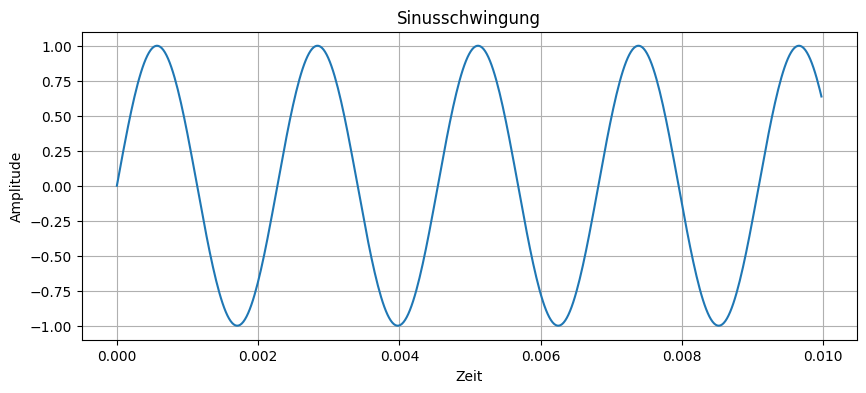

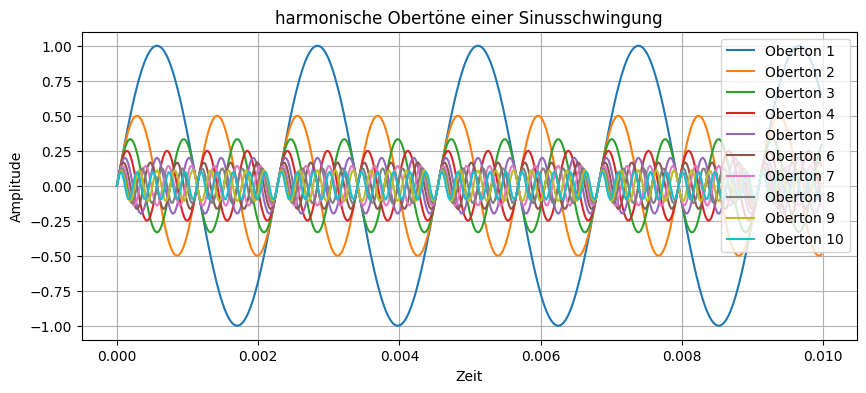

In [2]:
# sin wave 
sin_title = "Sinusschwingung"
plot_waveform(sample_rate, sinus, title=sin_title)
plot_sin_overtones(freq, sample_rate, duration, 10, title=sin_title)

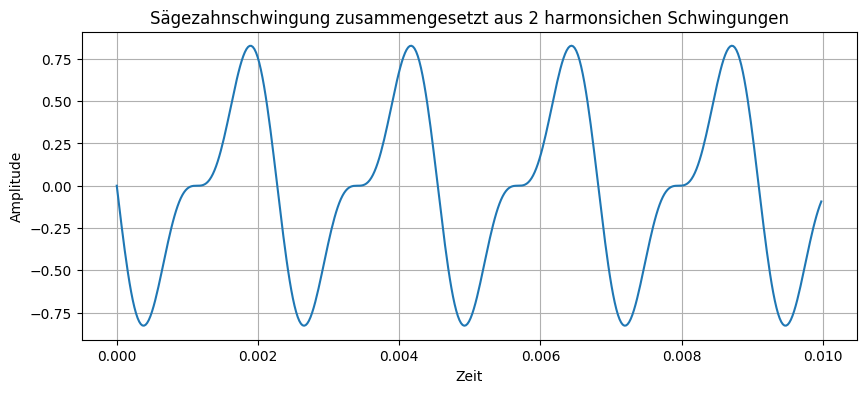

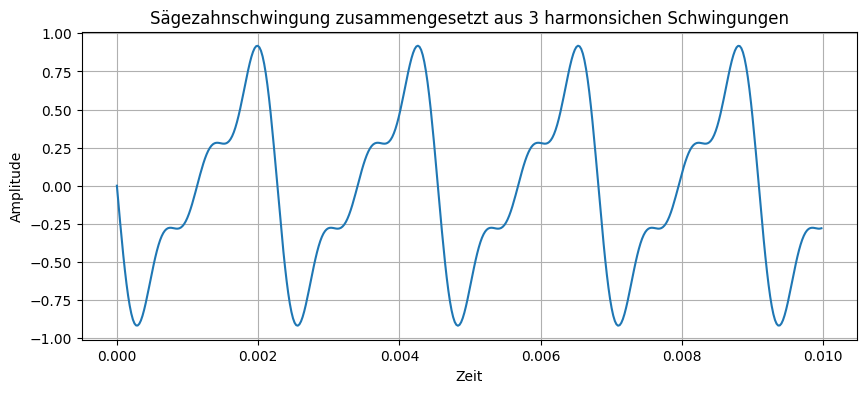

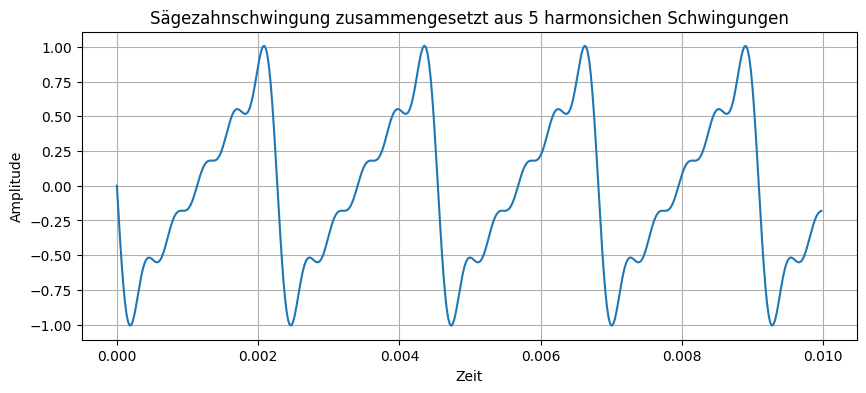

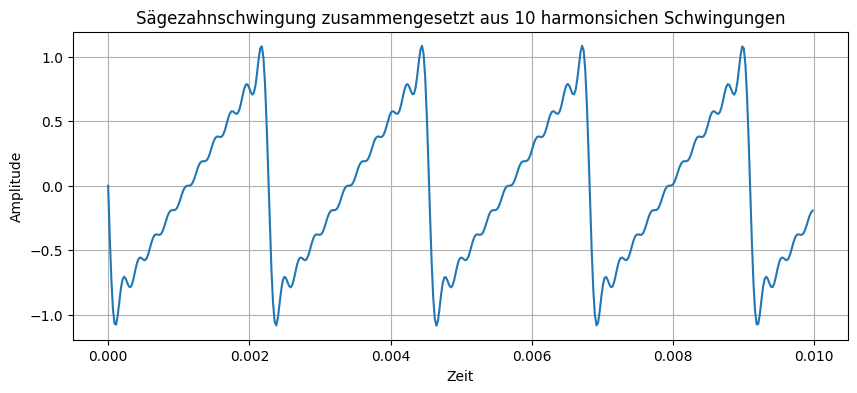

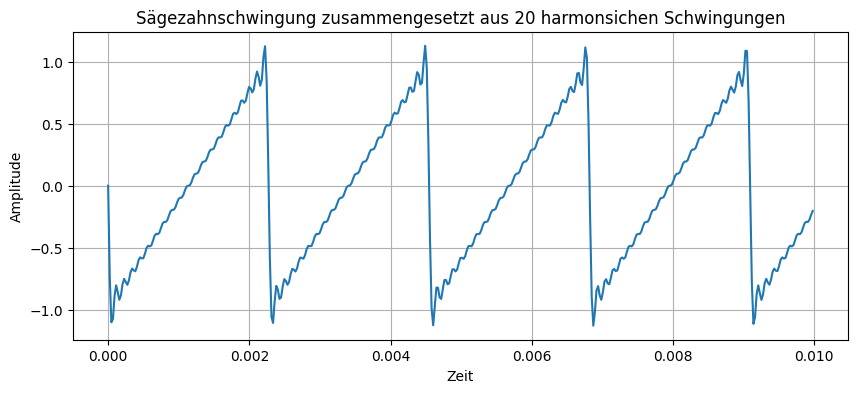

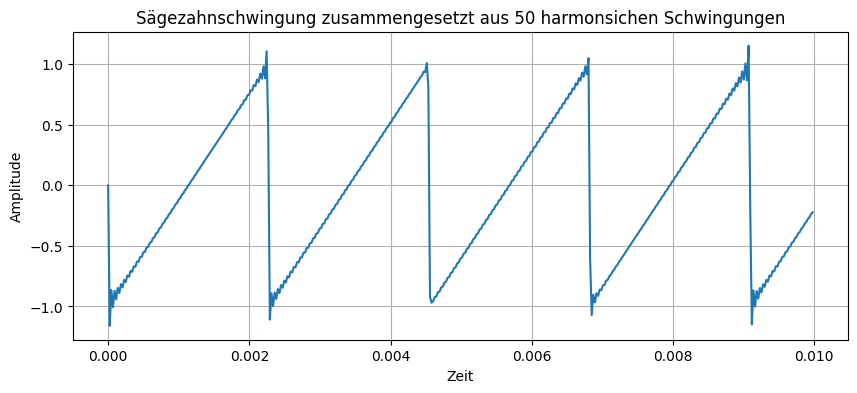

In [3]:
#saw wave
harmonics_to_display = [2, 3, 5, 10, 20, 50]

def saw_title(i):
    return f"Sägezahnschwingung zusammengesetzt aus {i} harmonsichen Schwingungen"

# Plot waveforms for specific harmonics of the saw and square waves
for h in harmonics_to_display:
    saw_harmonic = saw_wave(freq, sample_rate, duration, h)
    plot_waveform(sample_rate, saw_harmonic, title=saw_title(h))

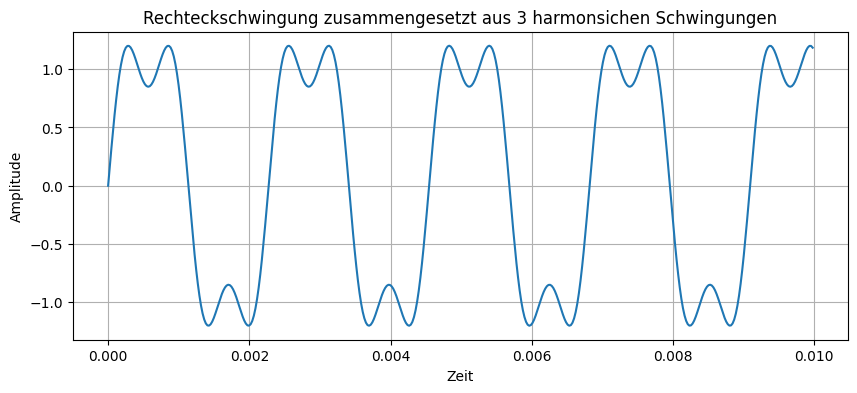

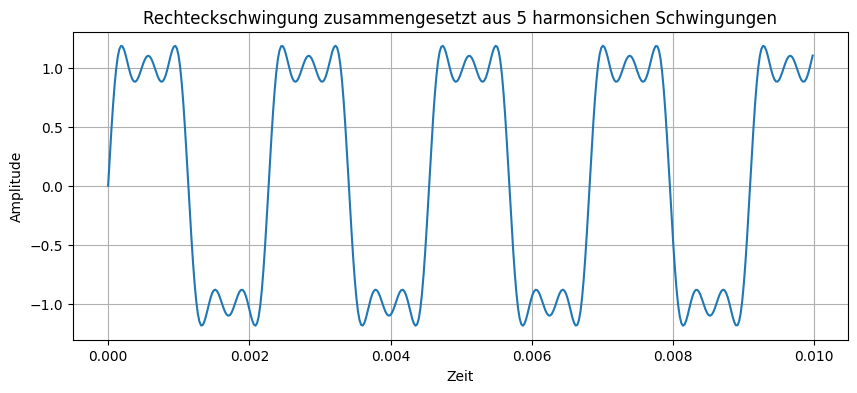

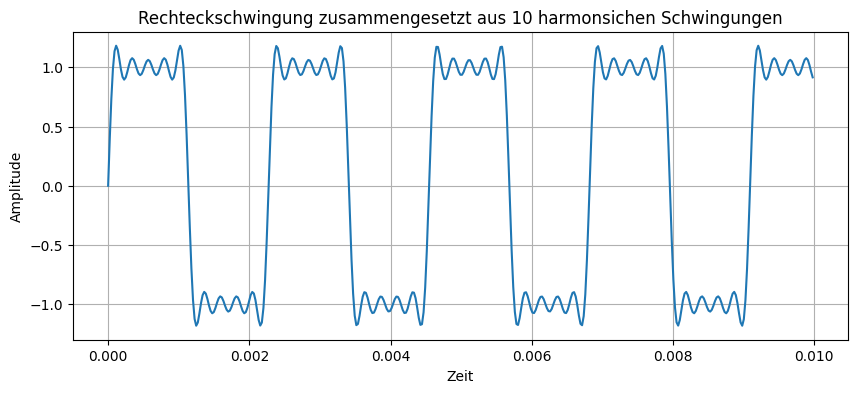

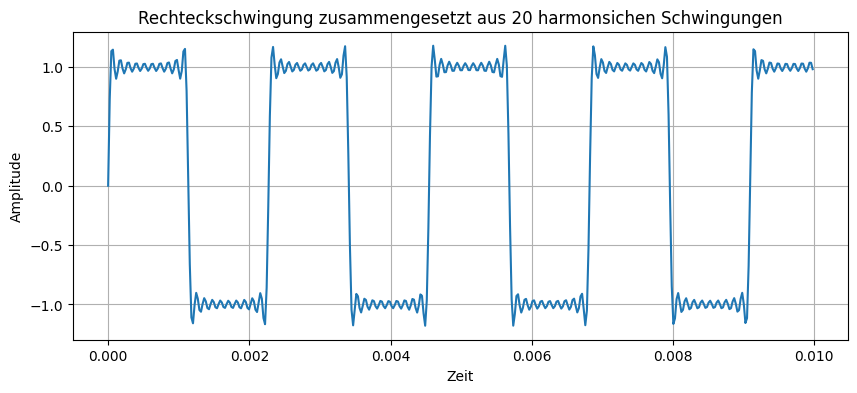

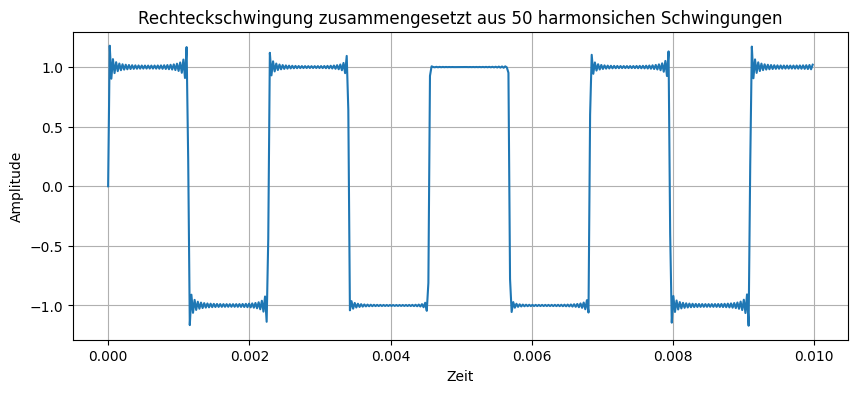

In [4]:
#square wave
harmonics_to_display = [3, 5, 10, 20, 50]

def square_title(i):
    return f"Rechteckschwingung zusammengesetzt aus {i} harmonsichen Schwingungen"

# Plot waveforms for specific harmonics of the saw and square waves
for h in harmonics_to_display:
    square_harmonic = square_wave(freq, sample_rate, duration, h)
    plot_waveform(sample_rate, square_harmonic, title=square_title(h))


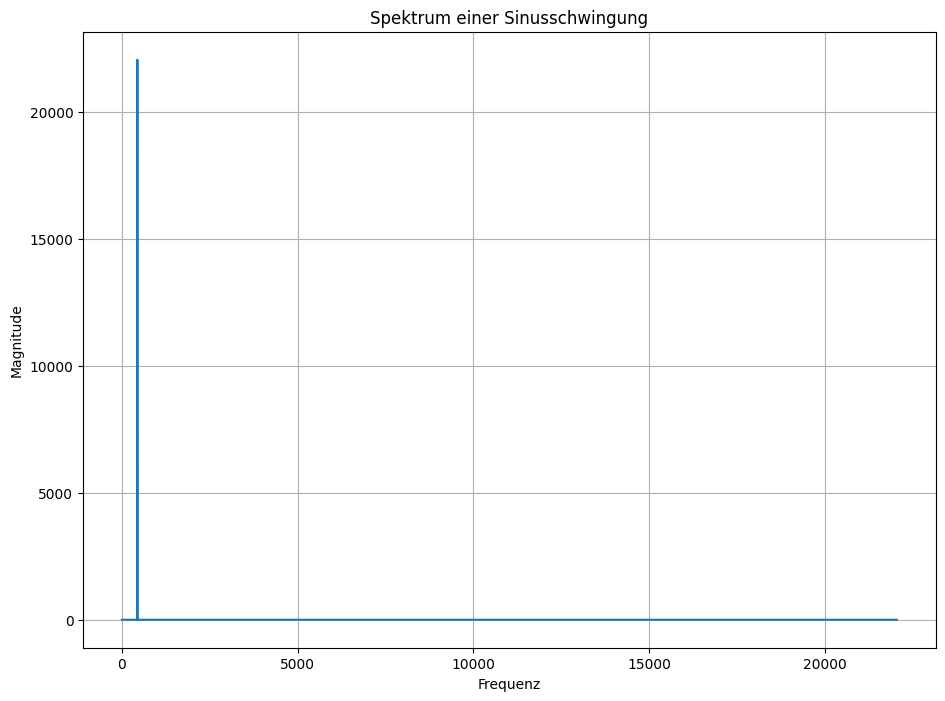

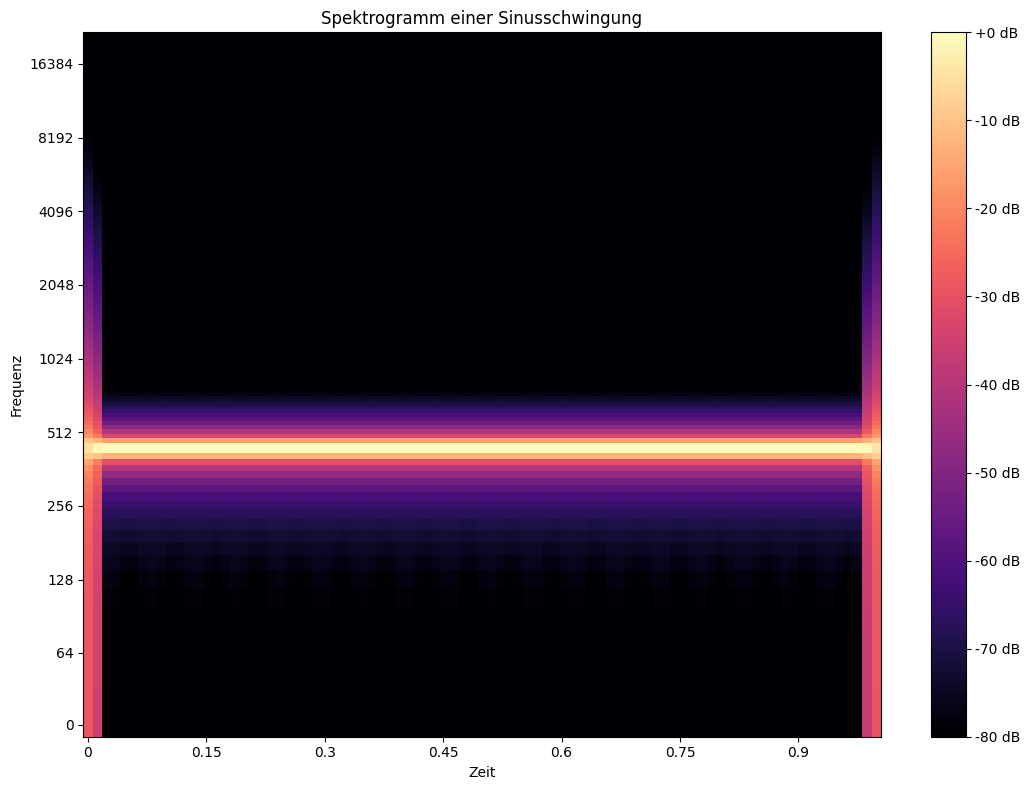

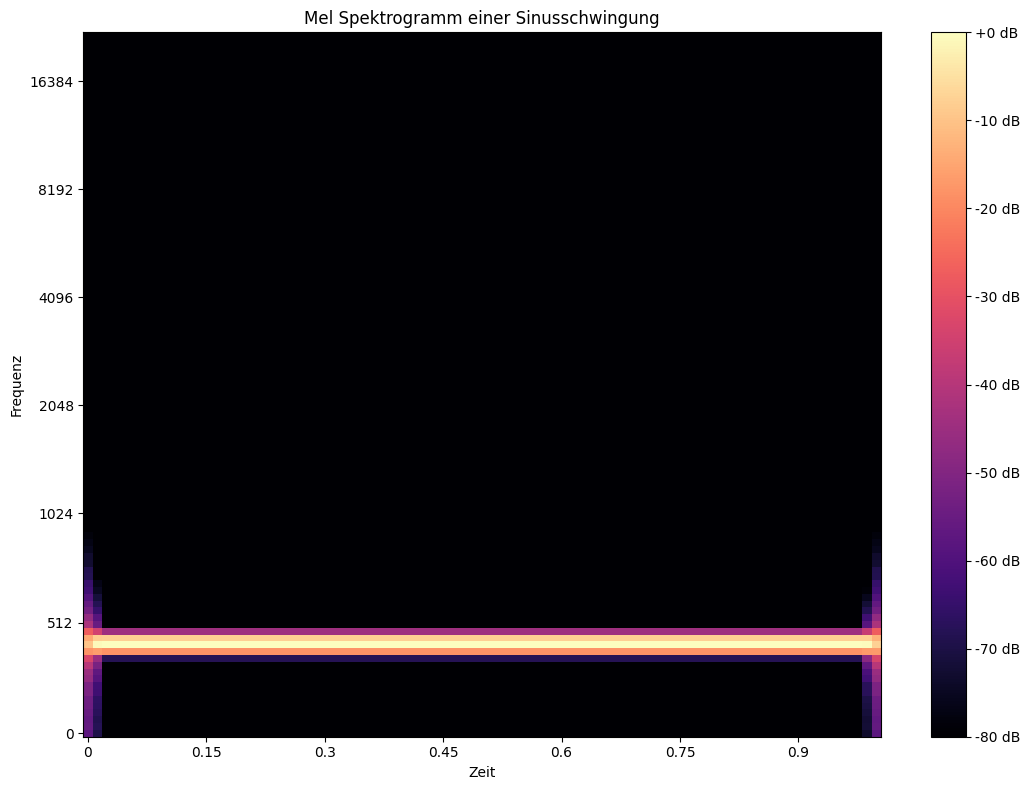

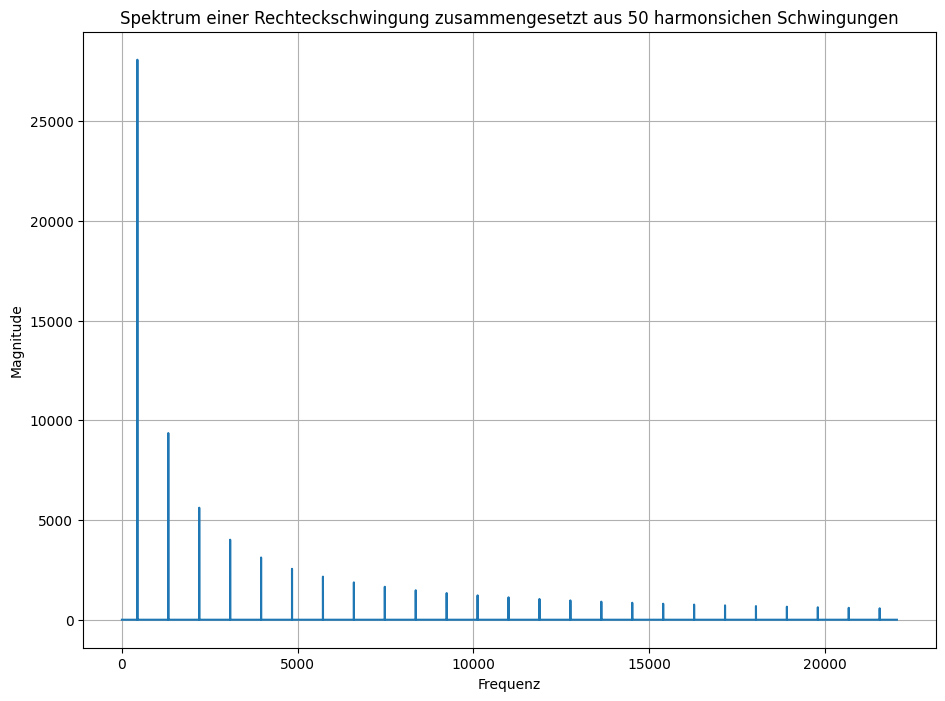

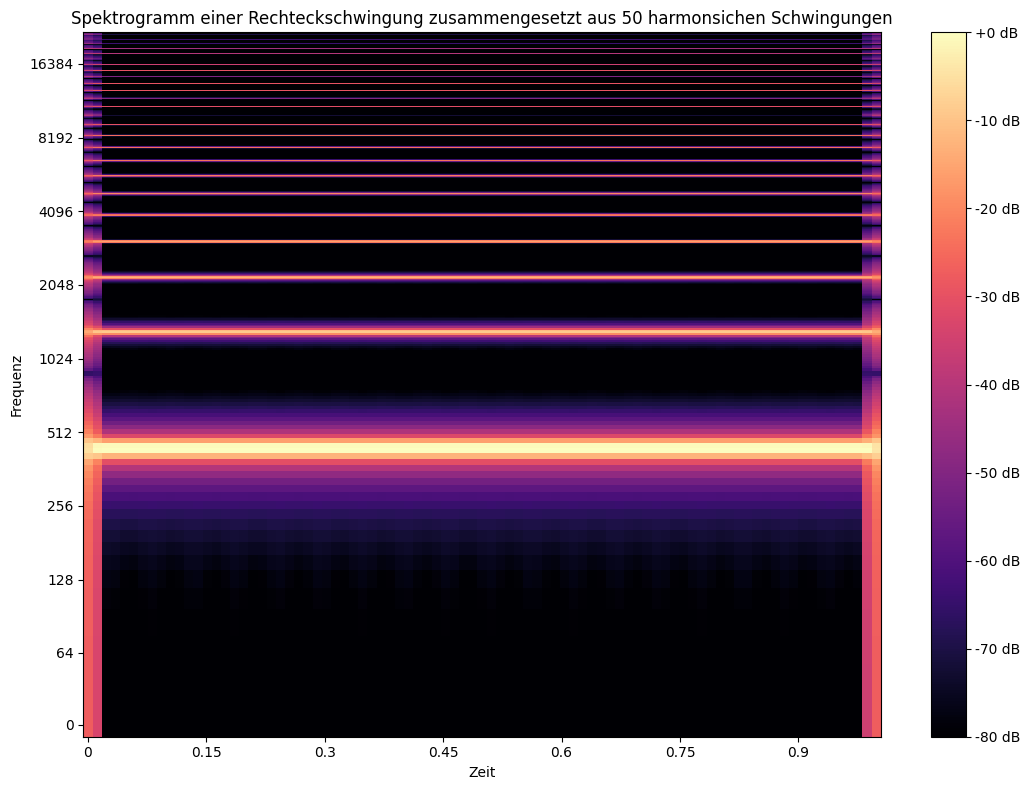

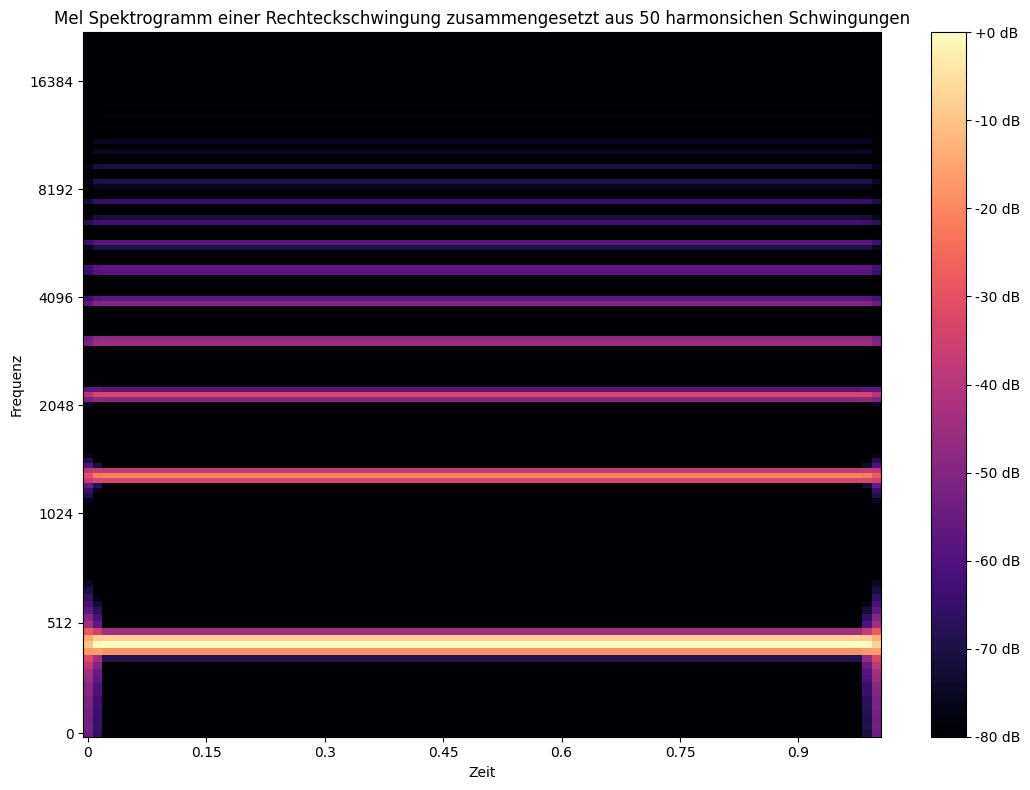

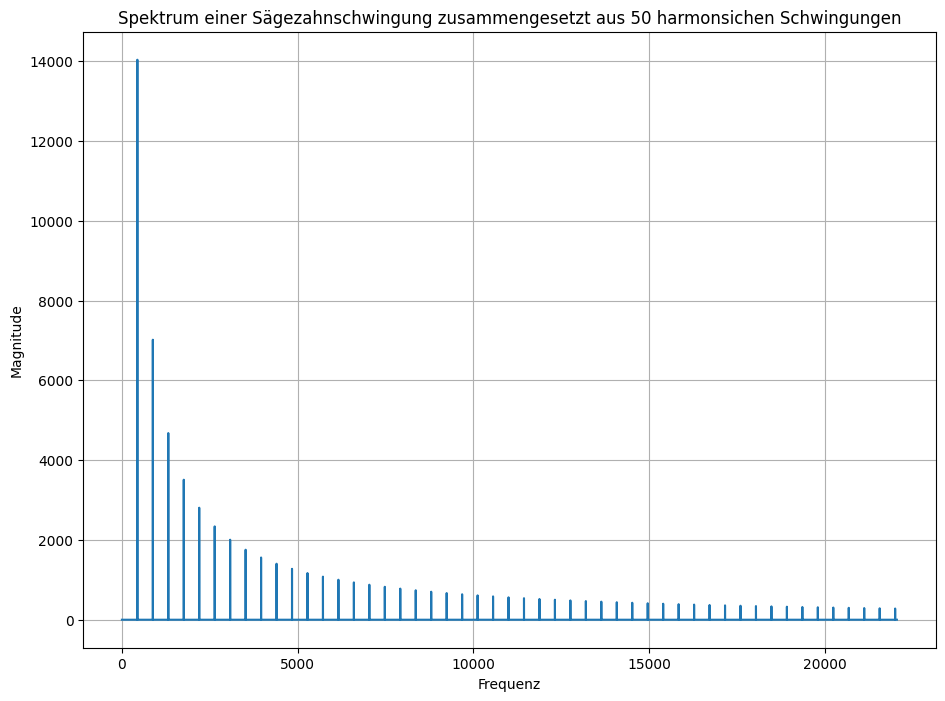

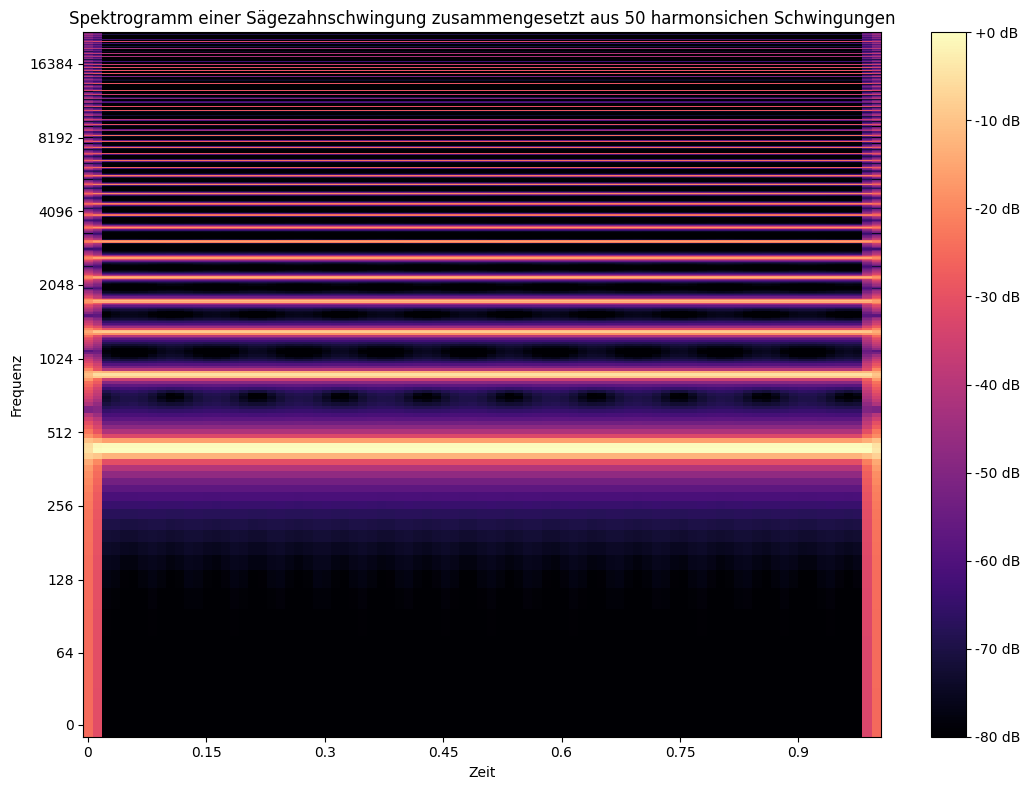

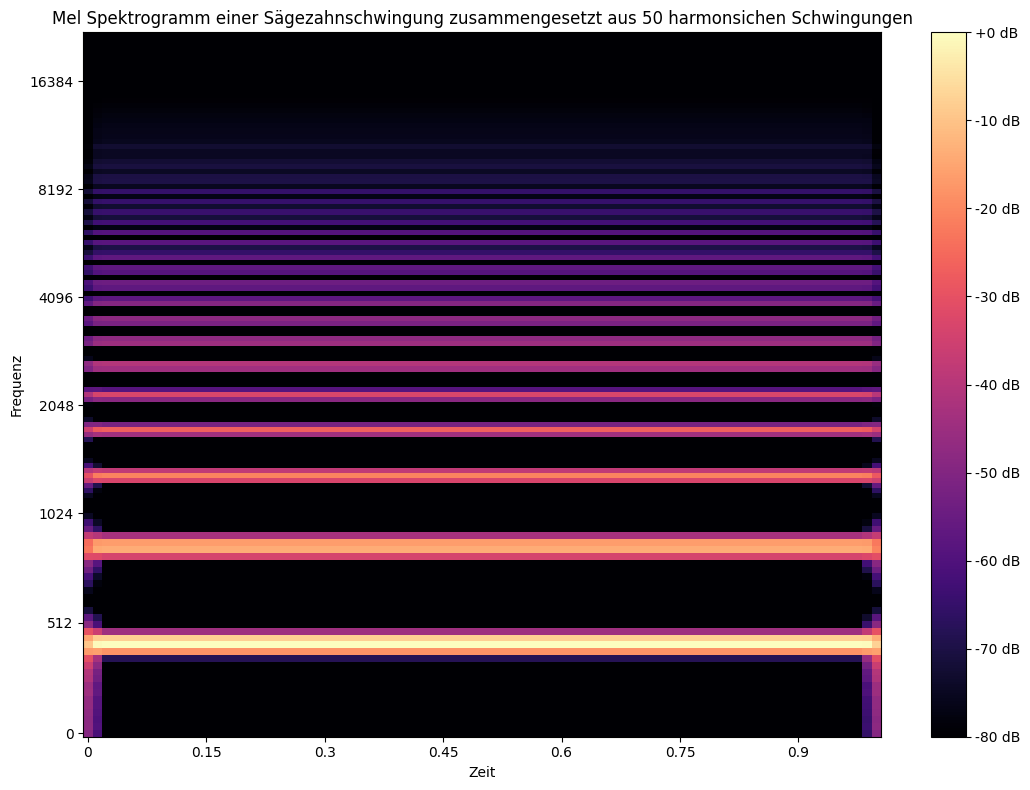

In [5]:
# plot spectrograms
def plot_three(waveform,title_waveform):
    plot_spectrum(waveform, sample_rate, title=title_waveform)
    plot_spectrogram(waveform, sample_rate, title=title_waveform)
    plot_melspectrogram(waveform, sample_rate, title=title_waveform)


plot_three(sinus,sin_title)
plot_three(square,square_title(50))
plot_three(saw,saw_title(50))

In [6]:
# Load the audio files
guitar = 'BasicGuitar440Hz.wav'
piano = 'GrandPiano440Hz.wav'
whiteNoise = 'whiteNoise.wav'

# Load the waveforms
guitarWaveform, guitarSample_rate = librosa.load(guitar, sr=44100)
pianoWaveform, pianoSample_rate = librosa.load(piano, sr=44100)
whiteNoiseWaveform, whiteNoiseSample_rate = librosa.load(whiteNoise, sr=44100)

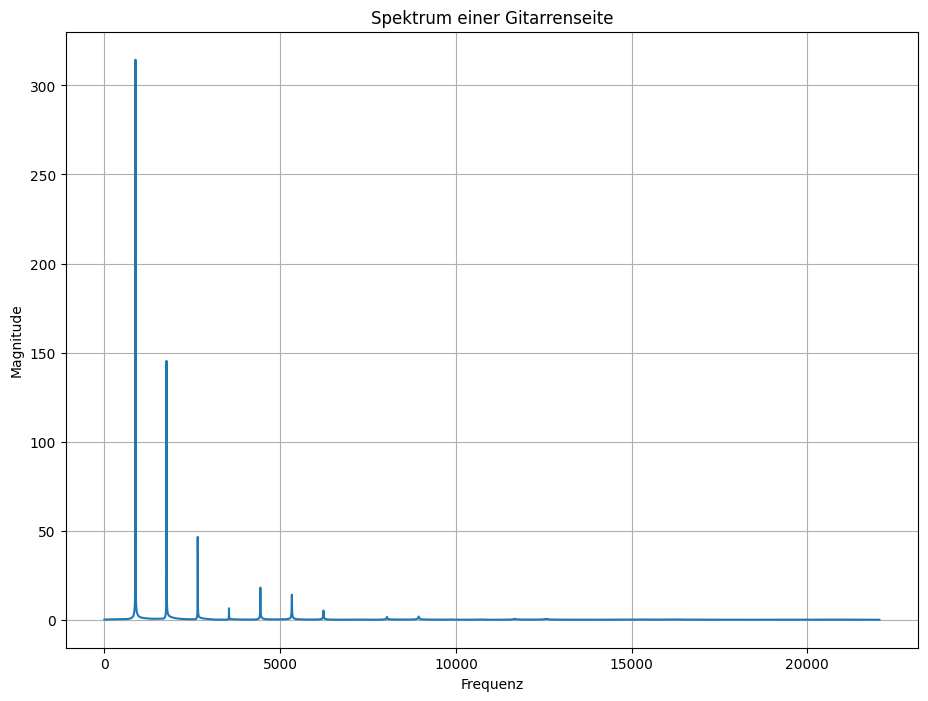

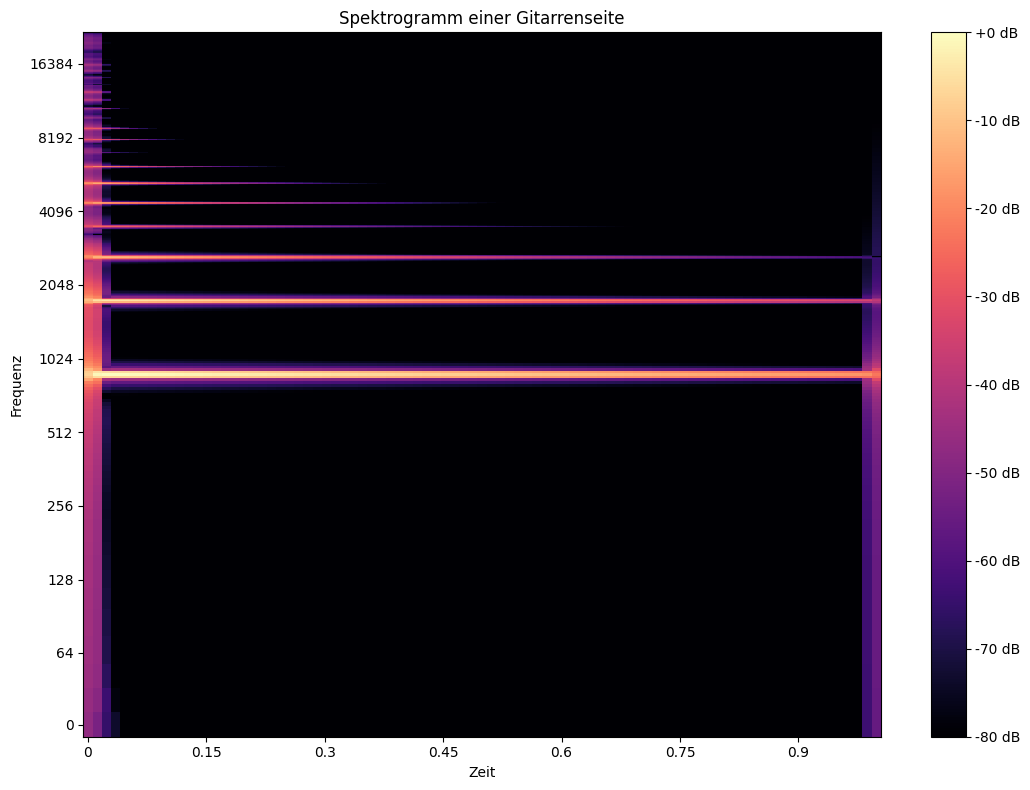

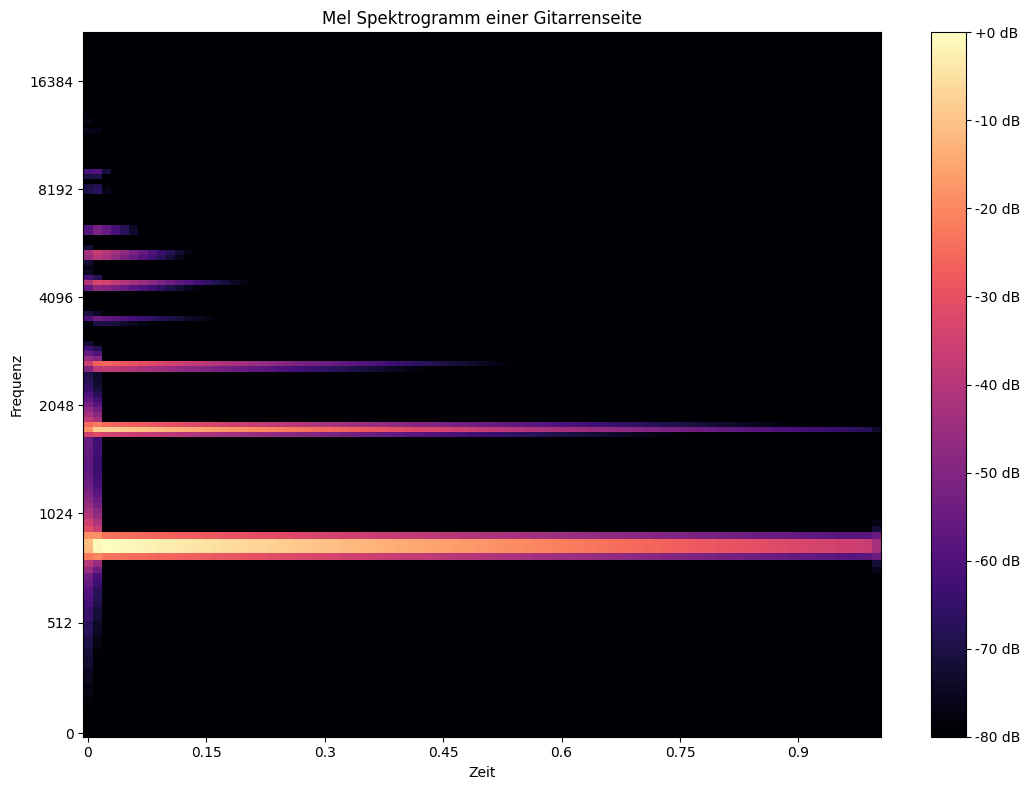

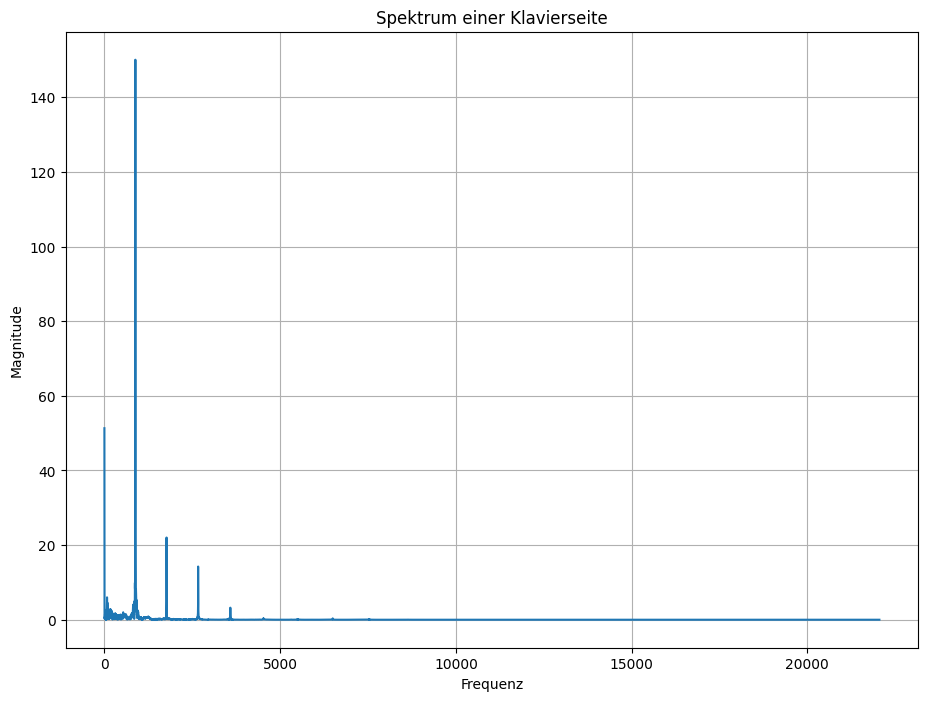

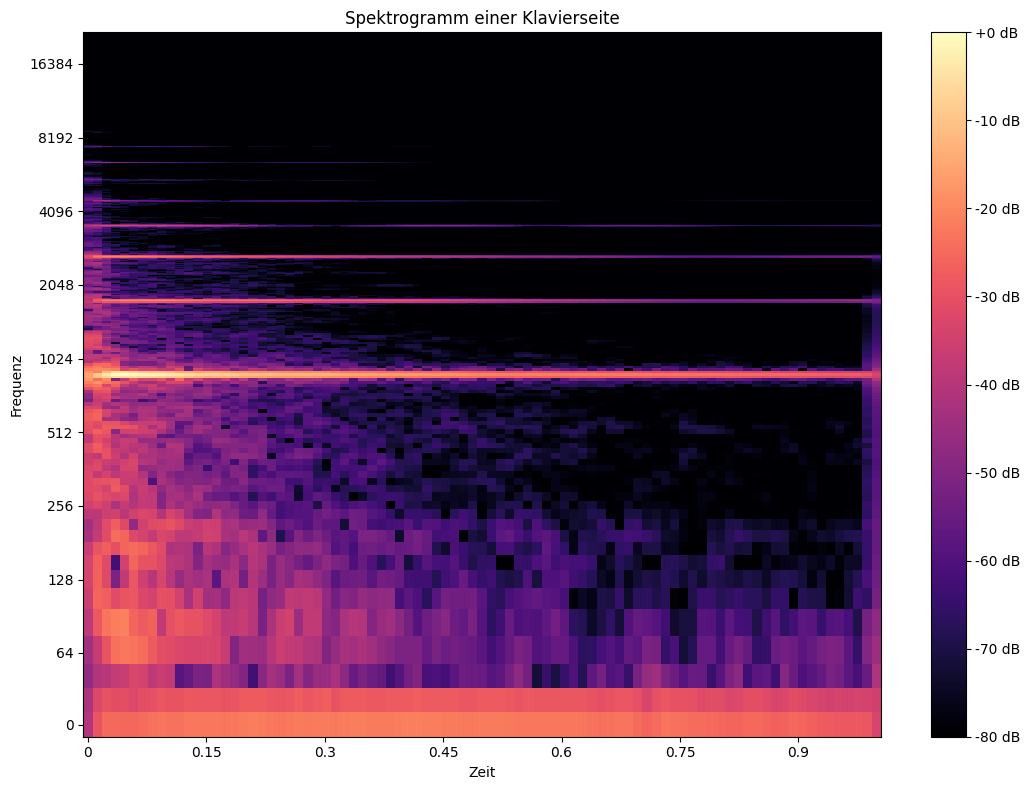

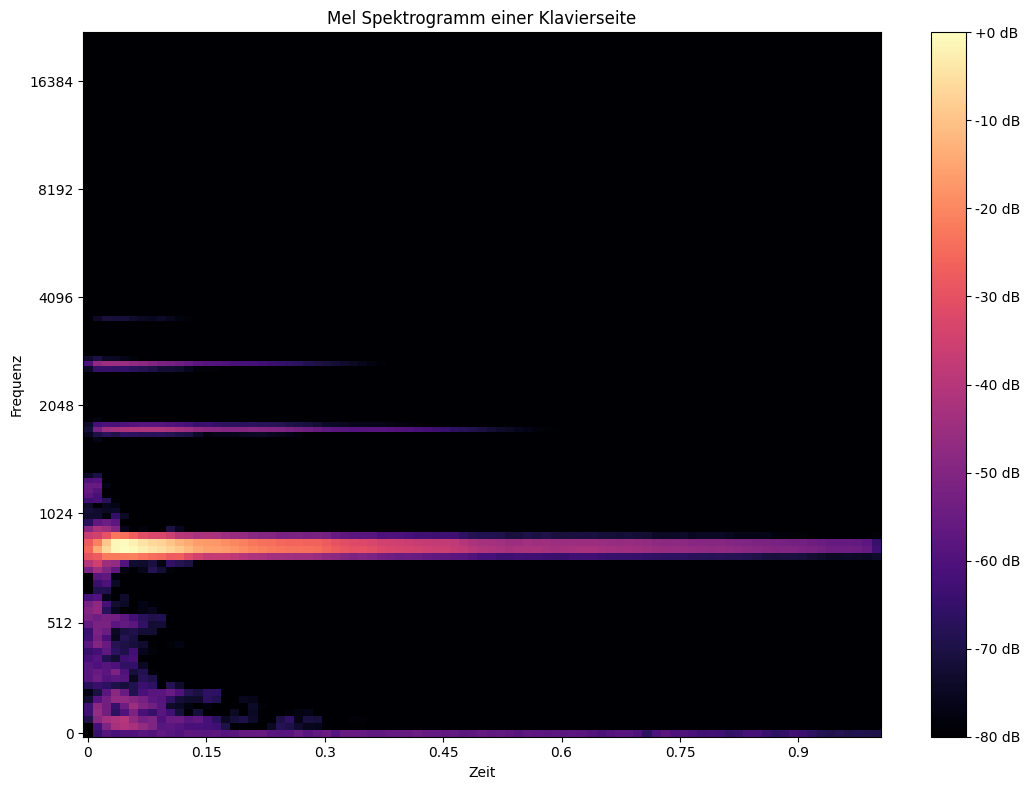

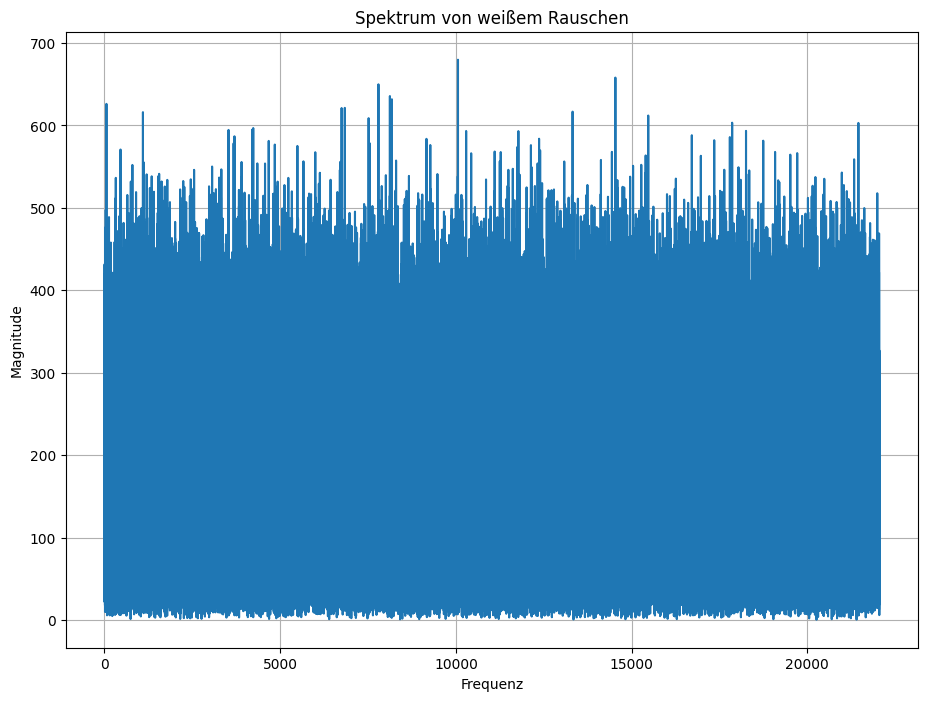

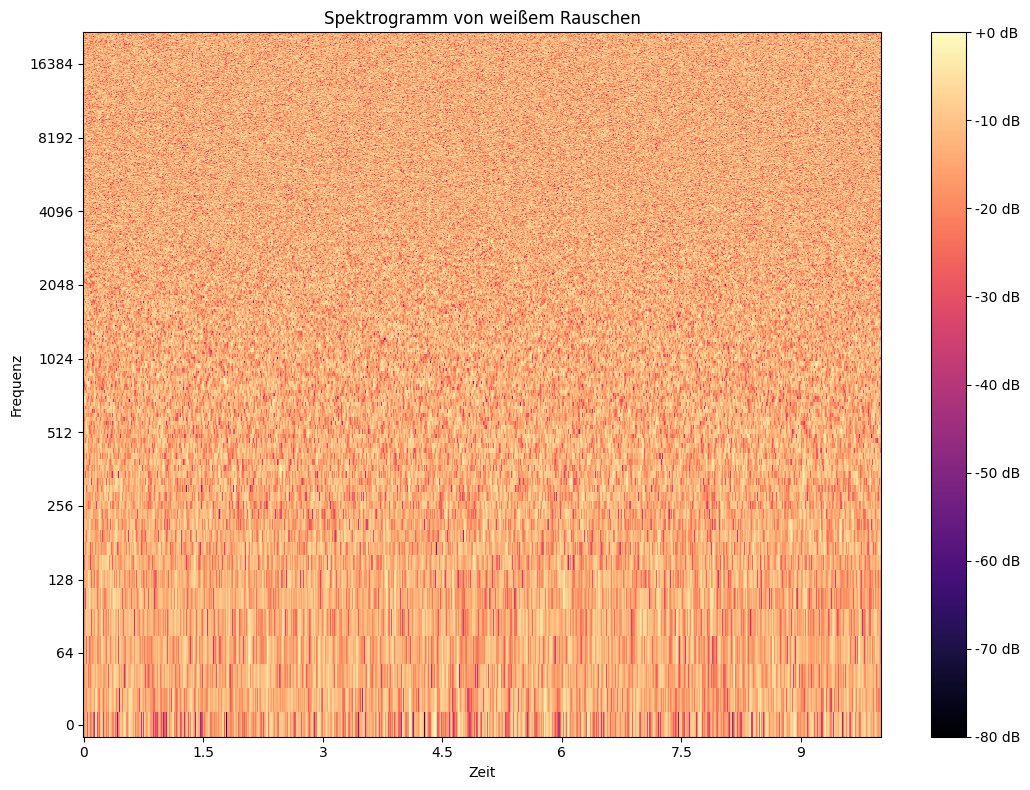

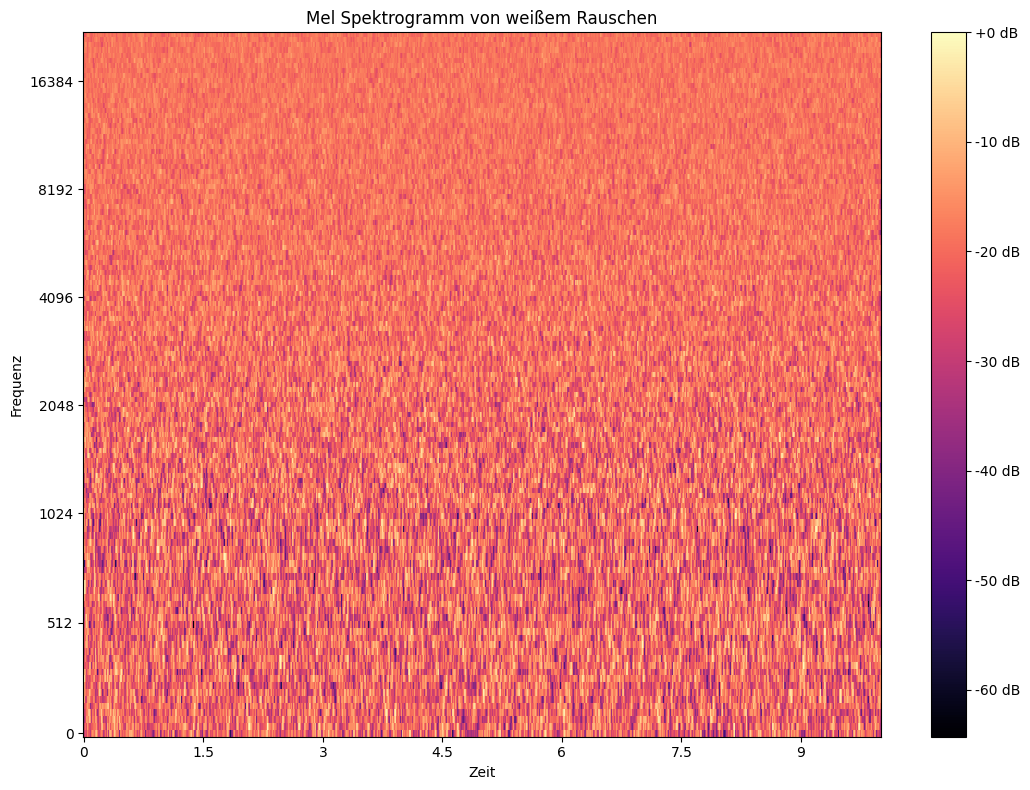

In [7]:
plot_three(guitarWaveform,"Gitarrenseite")
plot_three(pianoWaveform,"Klavierseite")
plot_three(whiteNoiseWaveform, "Weißes Rauschen")

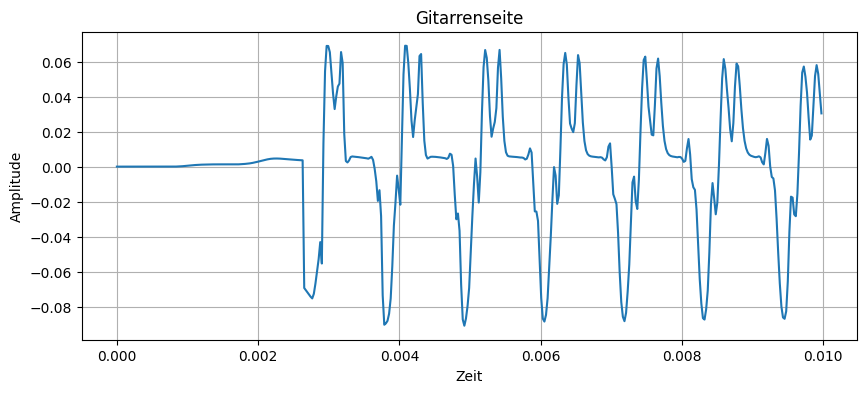

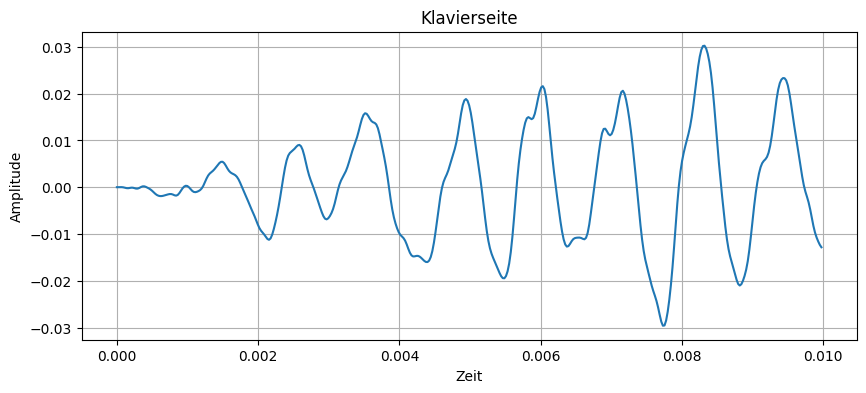

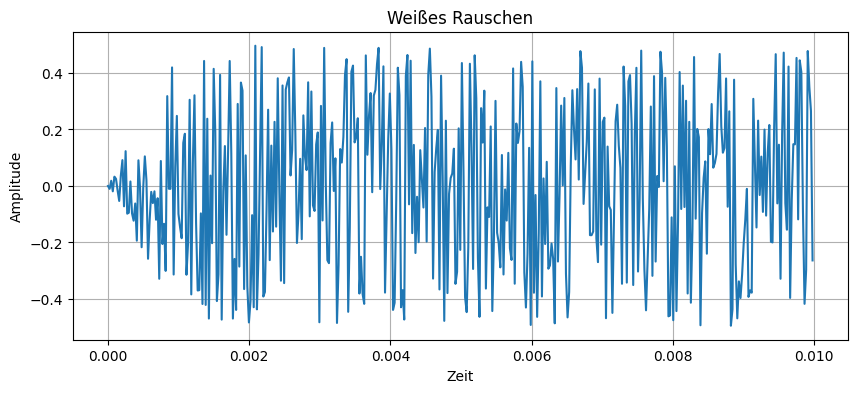

In [8]:
plot_waveform(guitarSample_rate, guitarWaveform, title="Gitarrenseite")
plot_waveform(pianoSample_rate,pianoWaveform, title="Klavierseite")
plot_waveform(whiteNoiseSample_rate, whiteNoiseWaveform, title="Weißes Rauschen")

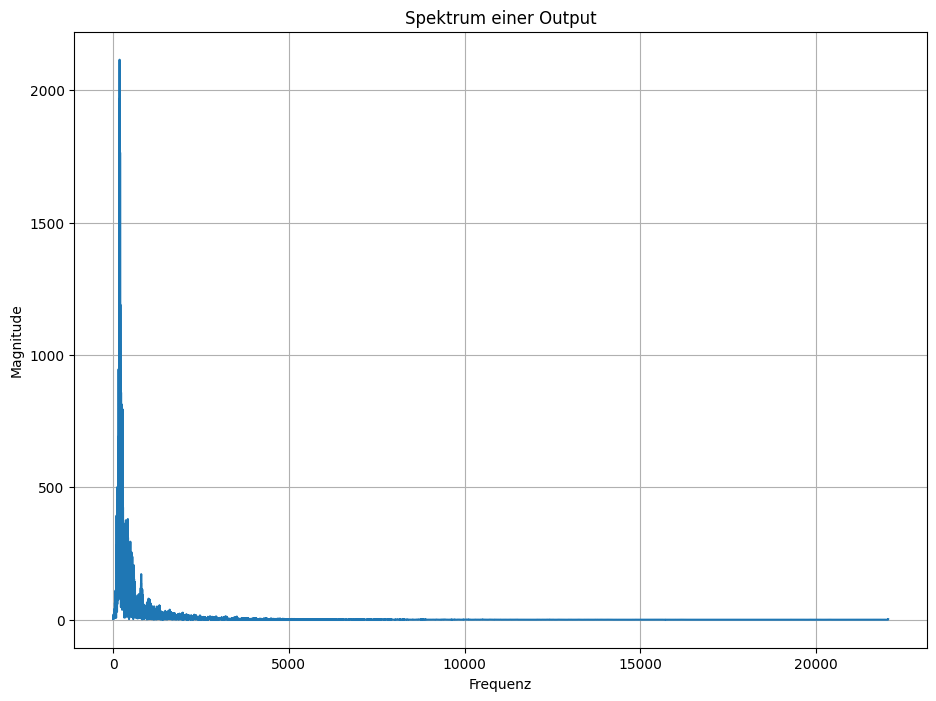

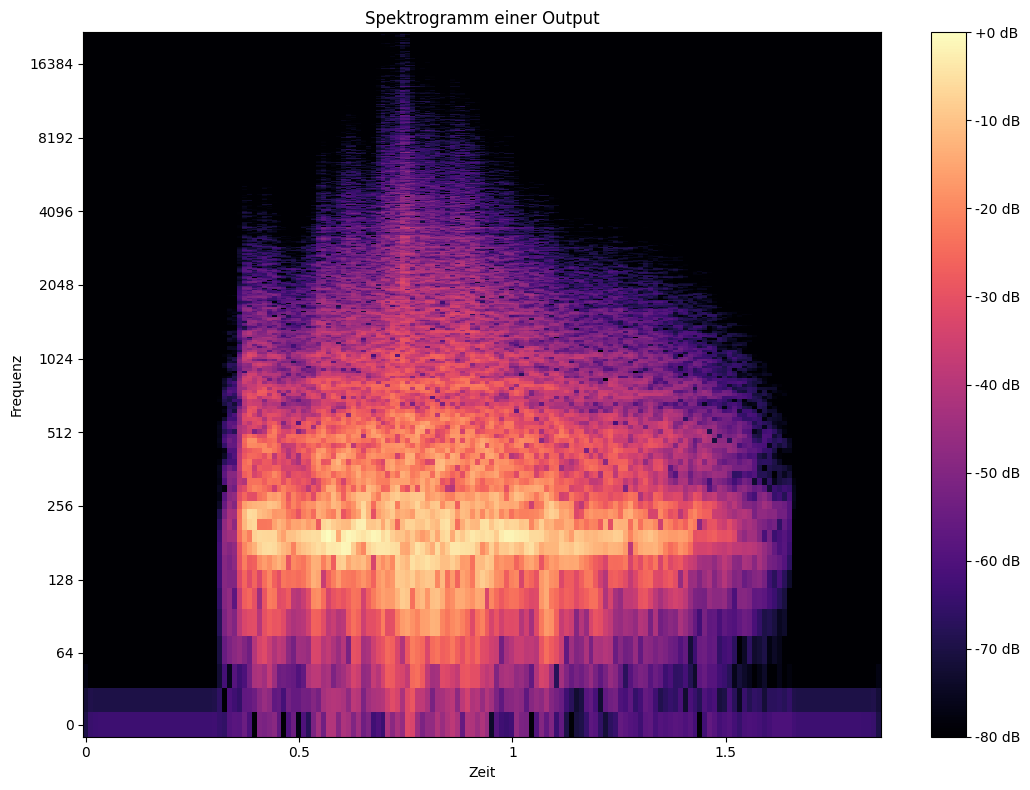

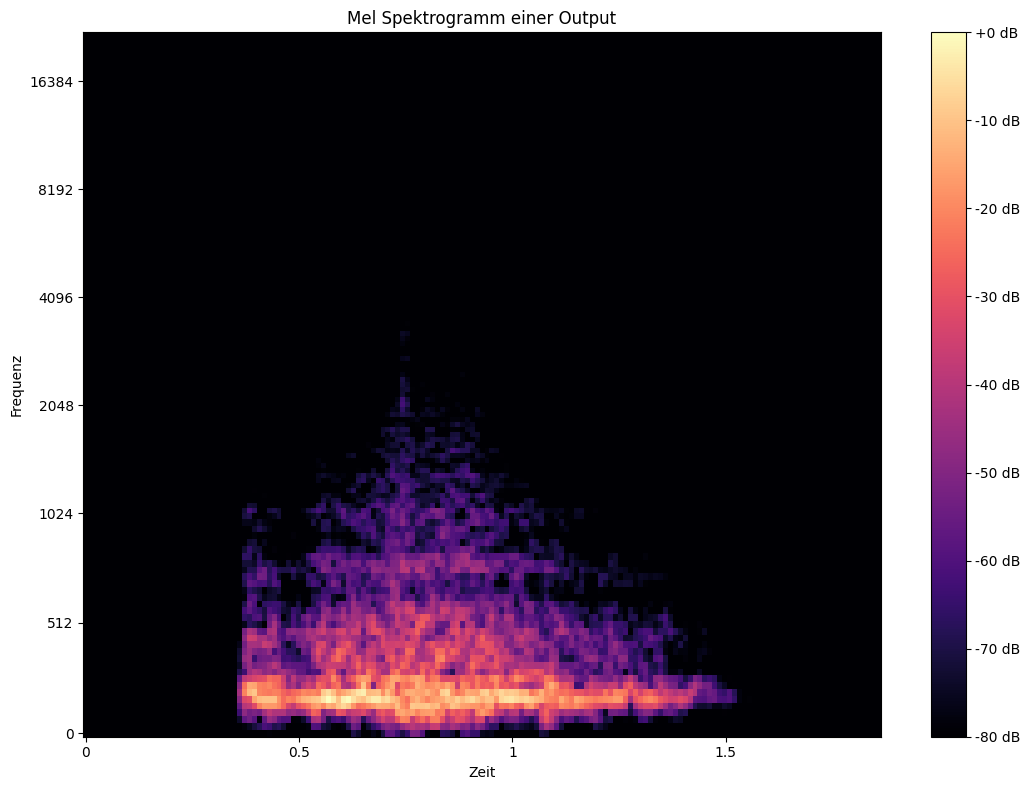

In [12]:
outputWav, outputWavSR = librosa.load("output.wav", sr=44100)
plot_three(outputWav,"Output")